# Part II - (Ford GO BIKE)
## by Khalil MISBAH

## Investigation Overview

> The Ford Gobike dataset and subsequent studies revealed a number of intriguing facts about the distribution of bike journeys taken within the chosen time period.
Explorations of these links have allowed me to see how seniors enjoy their journeys; primarily not sharing; how much time they spend on excursions; not particularly long; and to respond to other questions.

## Dataset Overview

> The present document examines a dataset that includes roughly 183,412 trips from a Ford GoBike. This data collection contains details on each ride taken in a bike-sharing programme that serves the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('./fordgo_bike_tripdata_clean.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,hour,day_of_week,date,hour-of-day,member_age,duration_min_log
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,869.750000,17,Thursday,2019-02-28,17,38,2.939394
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,1030.900000,12,Thursday,2019-02-28,12,50,3.013217
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,608.166667,17,Thursday,2019-02-28,17,33,2.784023
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,26.416667,23,Thursday,2019-02-28,23,48,1.421878
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959.0,Male,No,29.883333,23,Thursday,2019-02-28,23,63,1.475429


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Bike trips duration follows anormal trend, with riders subscribing for travels of an average period of about 12 min

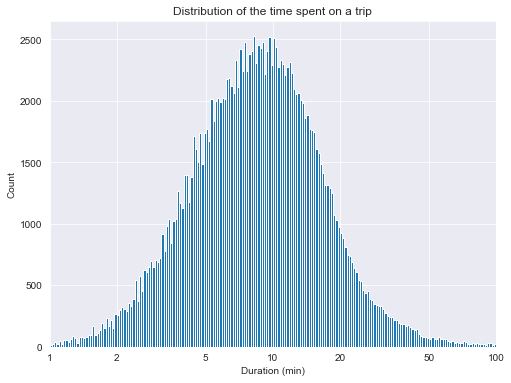

In [4]:
bins=10 ** np.arange(0, 3.15 + 0.01, 0.01)
ticks = [1,2,5,10,20,50,100,200,500,1000,2000]
labels = ['{}'.format(v) for v in ticks]
sb.set_style('darkgrid')
plt.figure(figsize=[8,6])
plt.hist(data=df, x='duration_min', bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlim([1,100])
plt.title('Distribution of the time spent on a trip')
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.show()

## (Visualization 2)

> Folks with age range between 25 and 35 years are considerend very frequent bike riders, with the most duration estimation of 5 and 20 minute time window.

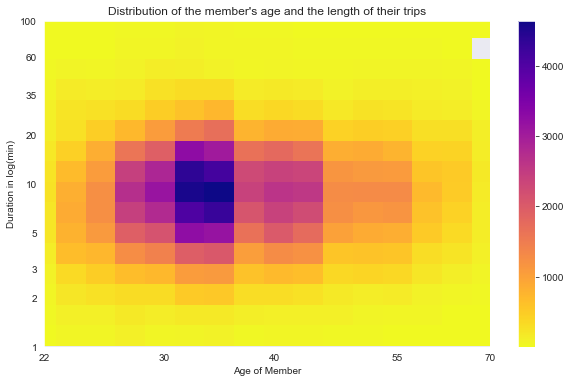

In [5]:
plt.figure(figsize = (10,6))
plt.hist2d(data = df, y = df['duration_min'].apply(np.log10), 
           x = df['member_age'].apply(np.log10), 
           cmap = 'plasma_r', cmin= 0.5, bins = 25)
plt.colorbar()
sb.set_style('darkgrid')
xticks = [18, 22, 30, 40, 55, 70]
yticks = [1, 2, 3, 5, 10, 20,35, 60, 100]
plt.xticks(np.log10(xticks), xticks)
plt.yticks(np.log10(yticks), yticks)
plt.xlim([np.log10(22),np.log10(70)])
plt.ylim([np.log10(1),np.log10(100)])
plt.xlabel('Age of Member')
plt.ylabel('Duration in log(min)')
plt.title("Distribution of the member's age and the length of their trips")
plt.show()

## (Visualization 3)

> The weekends is the period when non subscriber customers are most likely to use the bike tours, with an extra duration of a journey of about 7 minutes.

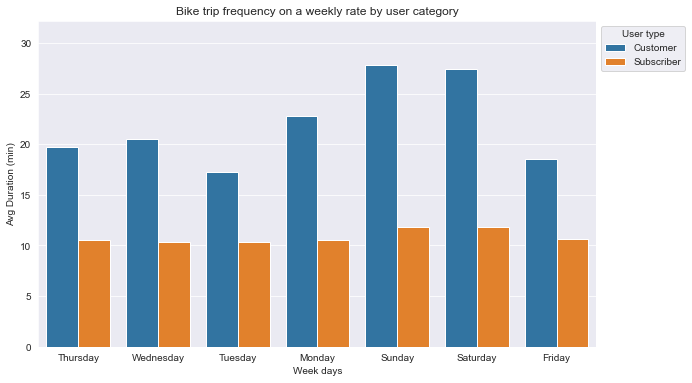

In [9]:
plt.figure(figsize = (10,6))
sb.barplot(data=df, x='day_of_week', y='duration_min', hue='user_type', errwidth=0)
plt.xlabel('Week days')
plt.ylabel('Avg Duration (min)')
plt.legend(loc=2, title='User type', bbox_to_anchor=(1,1))
plt.title("Bike trip frequency on a weekly rate by user category")
plt.show()

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [10]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 646022 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
^C

Interrupted


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 